# UAS PDAB BAGIAN B

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('D:/Kuliah/Semester 4/Penambangan Data dan Analisis Bisnis/Tugas Data Mining/UAS PDAB_M Zidane Yanfa N_2304220004/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Eksplorasi Awal

**a. Jumlah total penumpang**

In [97]:
jumlah_penumpang = len(df)
jumlah_penumpang

891

Jadi jumlah total penumpang adalah 891 orang.

**b. Jumlah penumpang yang selamat dan tidak selamat**

C:\Users\H P\AppData\Local\Temp\ipykernel_5996\1245715285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="pastel", ax=ax)


,Jumlah
Survived,
Tidak Selamat,549
Selamat,342


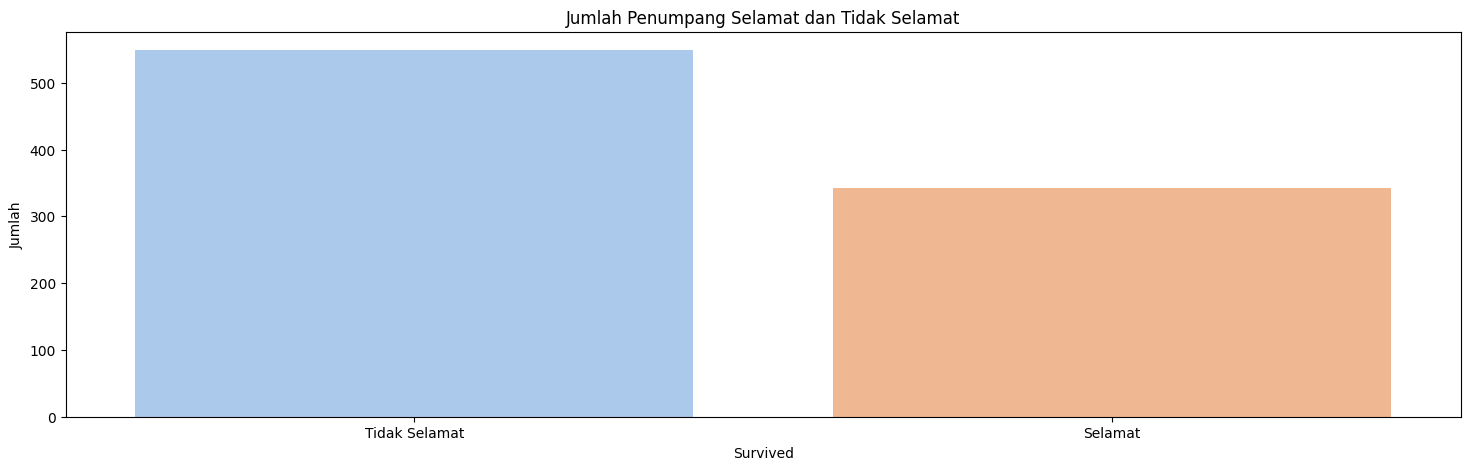

In [98]:
survival_counts = df['Survived'].value_counts().rename(index={0: "Tidak Selamat", 1: "Selamat"})

fig, ax = plt.subplots(figsize=(18, 5))

sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="pastel", ax=ax)
ax.set_title("Jumlah Penumpang Selamat dan Tidak Selamat")
ax.set_ylabel("Jumlah")
survival_counts.to_frame(name='Jumlah')

**c. Rata-rata umur, penumpang termuda, dan tertua**

In [99]:
rata_rata_umur = df['Age'].mean()
penumpang_termuda = df.loc[df['Age'].idxmin()]
penumpang_tertua = df.loc[df['Age'].idxmax()]

In [100]:
print(rata_rata_umur)

29.69911764705882


Rata-rata umurnya adalah 29,7 tahun.

In [101]:
print(penumpang_termuda)

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object


Penumpang termuda adalah (Thomas, Master. Assad Alexander)

In [102]:
print(penumpang_tertua)

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object


Penumpang tertua adalah (Barkworth, Mr. Algernon Henry Wilson)

**d. Jumlah penumpang berdasarkan jenis kelamin**

C:\Users\H P\AppData\Local\Temp\ipykernel_5996\189925059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2", ax=ax)


,Jumlah
Sex,
male,577
female,314


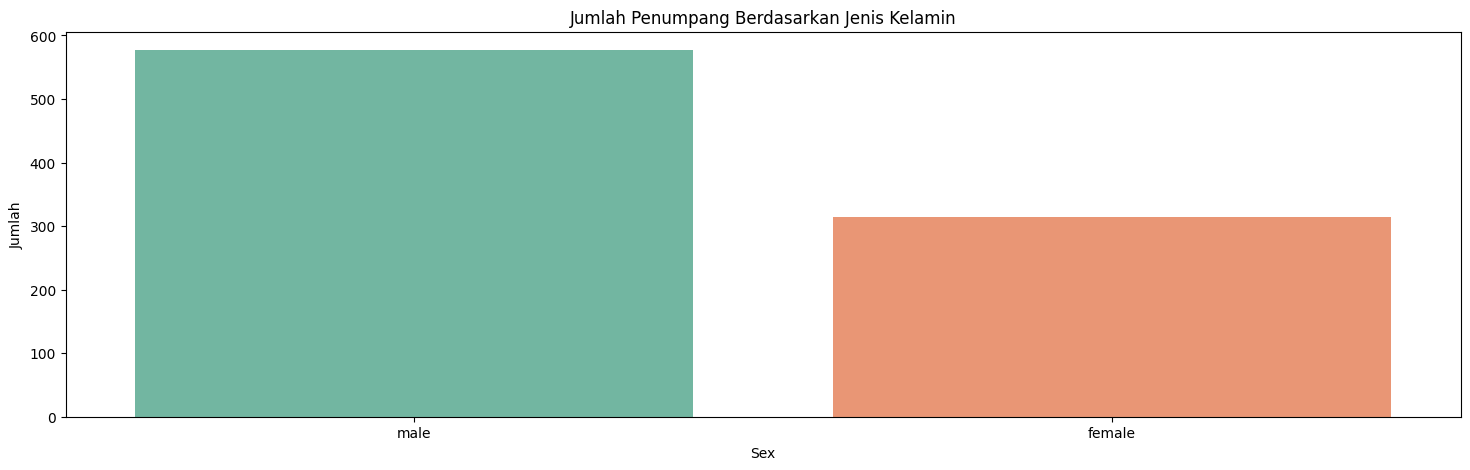

In [103]:
fig, ax = plt.subplots(figsize=(18, 5))

gender_counts = df['Sex'].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2", ax=ax)
ax.set_title("Jumlah Penumpang Berdasarkan Jenis Kelamin")
ax.set_ylabel("Jumlah")
gender_counts.to_frame(name='Jumlah')

Berdasarkan hasil tabel dan visualisai, penumpang laki-laki lebih banyak daripada penumpang perempuan. 

**e. Jumlah penumpang berdasarkan kelas dan persentase kelas 1**

In [104]:
pclass_counts = df['Pclass'].value_counts().sort_index()
persentase_kelas_1 = (pclass_counts[1] / jumlah_penumpang) * 100

pclass_counts.to_frame(name='Jumlah')

,Jumlah
Pclass,
1,216
2,184
3,491


In [105]:
persentase_kelas_1 = round(persentase_kelas_1, 2)
print(persentase_kelas_1)

24.24


Persentase penumpang Kelas 1 adalah 24,24%

C:\Users\H P\AppData\Local\Temp\ipykernel_5996\940201133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_counts.index.astype(str), y=pclass_counts.values, palette="Set3", ax=ax, legend=False)


Text(0.5, 0, 'Kelas')

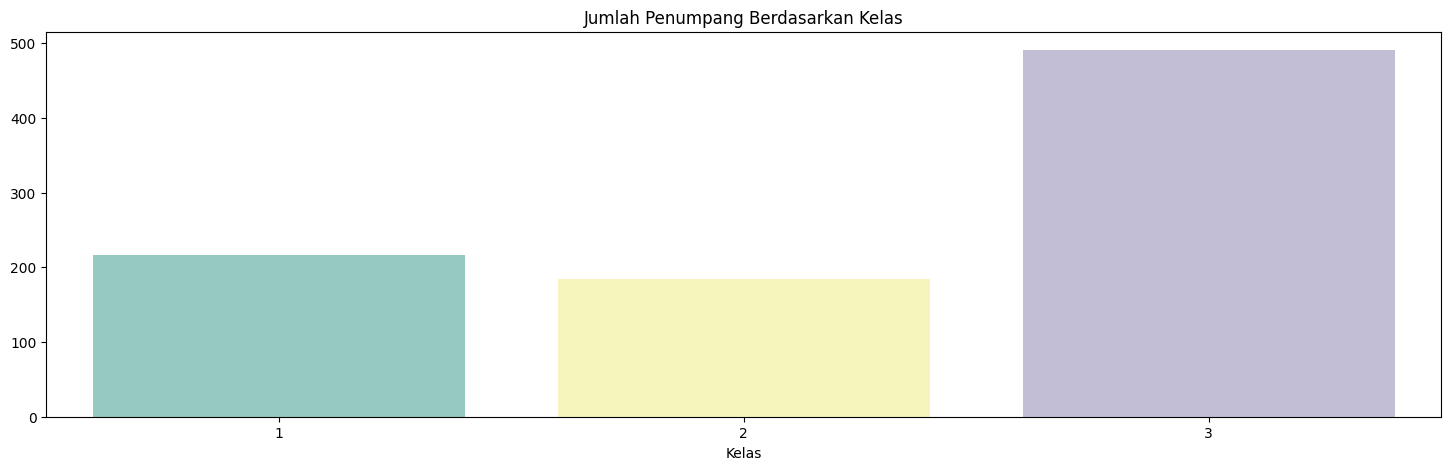

In [106]:
fig, ax = plt.subplots(figsize=(18, 5))

sns.barplot(x=pclass_counts.index.astype(str), y=pclass_counts.values, palette="Set3", ax=ax, legend=False)
ax.set_title("Jumlah Penumpang Berdasarkan Kelas")
ax.set_xlabel("Kelas")

## 2. Preprocessing

**a. Apakah terdapat missing value?**

In [107]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- Pada kolom umur (Age) terdapat 177 *missing value*

- Pada kolom kabin (Cabin) terdapat 687 *missing value*

- Pada kolom keberangkatan (Embarked) terdapat 177 *missing value*

**b. Jika ya, apa yang anda lakukan?**

Mengisi data yang kosong dengan: 

- Kolom umur (Age): isi dengan median.

- Kolom kabin (Cabin): banyak missing, bisa di-drop.

- Kolom keberangkatan (Embarked): hanya 2 missing, bisa diisi dengan modus.

In [108]:
df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Cabin' in df.columns:
	df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\H P\AppData\Local\Temp\ipykernel_5996\2866385538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\H P\AppData\Local\Temp\ipykernel_5996\2866385538.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!**

Outlier adalah nilai yang jauh berbeda dari mayoritas data, bisa mengganggu analisis statistik dan model prediktif.

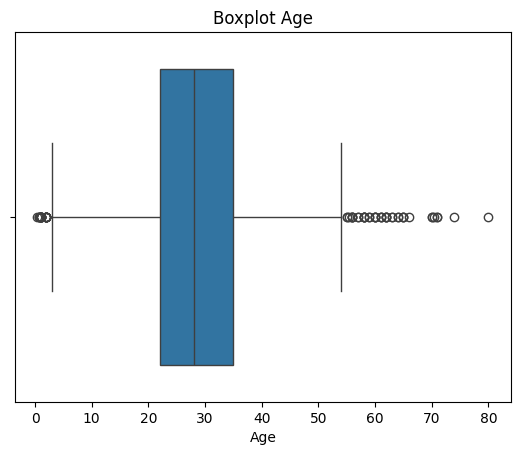

,Age
7,2.00
11,58.00
15,55.00
16,2.00
33,66.00
...,...
827,1.00
829,62.00
831,0.83
851,74.00


In [109]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot Age")
plt.show()

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_outliers = df[(df['Age'] < (Q1_age - 1.5 * IQR_age)) | (df['Age'] > (Q3_age + 1.5 * IQR_age))]
age_outliers[['Age']]

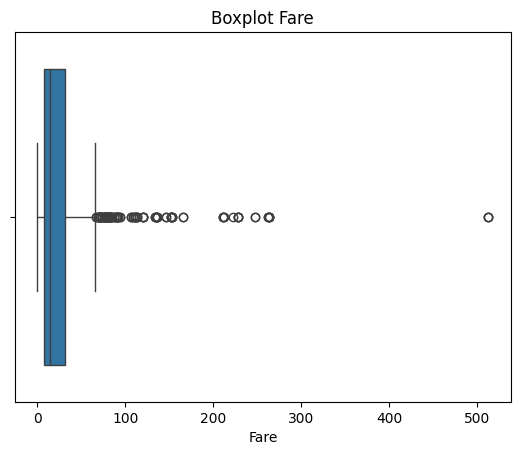

,Fare
1,71.2833
27,263.0000
31,146.5208
34,82.1708
52,76.7292
...,...
846,69.5500
849,89.1042
856,164.8667
863,69.5500


In [110]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot Fare")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
fare_outliers[['Fare']]

Berdasarkan uji outlier menggunakan Boxplot dan IQR, dapat disimpulkan bahwa data tersebut memiliki outlier. 

**d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

Menurut saya outlier pada data tersebut perlu diatasi. 
Salah satu cara untuk mengatasi outlier adalah dengan menggunakan clipping

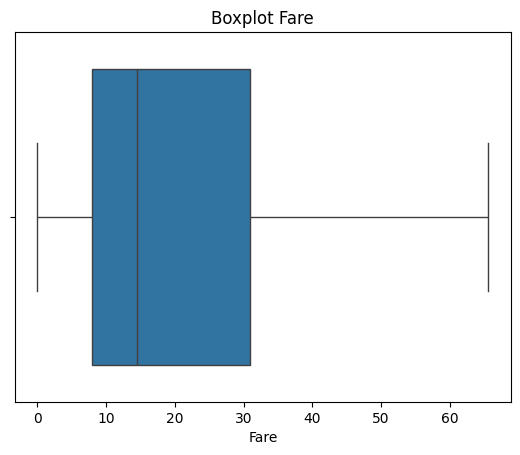

In [111]:
# Tangani outlier 'Fare' dengan clipping
upper_limit = Q3 + 1.5 * IQR
df['Fare'] = df['Fare'].apply(lambda x: upper_limit if x > upper_limit else x)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot Fare")
plt.show()

Kolom 'Fare' sudah tidak memiliki outlier.

**e. Jika dibutuhkan, lakukan transformasi/standarisasi/scaling terhadap data**

In [112]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].head()

,Age,Fare
0,-0.565736,-0.820552
1,0.663861,2.031623
2,-0.258337,-0.787578
3,0.433312,1.419297
4,0.433312,-0.781471


## 3. Modeling

**a. Penjelasan Proses Pembagian Data**

Data dibagi menjadi data training dan data testing agar:

- Training set digunakan untuk melatih model.

- Testing set digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya. 

Tujuannya adalah mengevaluasi seberapa baik model bisa melakukan generalisasi.

**b. Proporsi Pembagian**

Proporsi pembagiannya adalah 80% training dan 20% testing, karena proporsi ini umum digunakan karena memberikan cukup data untuk model belajar sambil tetap menyisakan cukup data untuk evaluasi.

**c. Model Klasifikasi dari 3 Algoritma Berbeda**

Model klasifikasi yang digunakan:

- Logistic Regression: model statistik yang digunakan untuk memprediksi probabilitas suatu kejadian biner (ya/tidak, benar/salah) dengan memetakan input ke output antara 0 dan 1 menggunakan fungsi logistik (sigmoid).

- Decision Tree: model supervised learning yang membagi data secara rekursif berdasarkan fitur-fitur untuk mencapai keputusan akhir (seperti pohon keputusan dengan node dan daun).

- Random Forest: ensemble method yang menggabungkan banyak Decision Tree (biasanya ratusan) untuk meningkatkan akurasi dan mengurangi overfitting.

Melatih Model: 

In [113]:
df_encoded = df.copy()
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

scaler = StandardScaler()
df_encoded[['Age', 'Fare']] = scaler.fit_transform(df_encoded[['Age', 'Fare']])

X = df_encoded.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

Cara kerja Logistic Regression, Decision Tree, dan Random Forest

In [114]:
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)

logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

**d. Nilai Evaluasi dari Masing-Masing Model**

In [115]:
eval_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
eval_tree = classification_report(y_test, y_pred_tree, output_dict=True)
eval_forest = classification_report(y_test, y_pred_forest, output_dict=True)

{
    "Logistic Regression Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Decision Tree Accuracy": accuracy_score(y_test, y_pred_tree),
    "Random Forest Accuracy": accuracy_score(y_test, y_pred_forest)
}

{'Logistic Regression Accuracy': 0.8044692737430168,
 'Decision Tree Accuracy': 0.770949720670391,
 'Random Forest Accuracy': 0.8156424581005587}

Nilai evaluasi masing-masing model: 

- Logistic Regression: 80,45%

- Decision Tree Accuracy: 77,10%

- Random Forest Accuracy: 81,56%

Arti dari setiap metrik evaluasi: 

- Akurasi: proporsi prediksi yang benar dari total prediksi.

- Metrik lain yang biasanya dilihat (dalam classification_report) meliputi:

    - Precision: Ketepatan prediksi positif.

    - Recall: Kemampuan model menangkap data positif.

    - F1-Score: Harmonis antara precision dan recall.

**e. Perbandingan dan Ulasan**

- Random Forest menghasilkan akurasi tertinggi (81,56%), sedikit lebih baik dari Logistic Regression.

- Decision Tree sedikit tertinggal (77,10%), kemungkinan karena overfitting ke data training. 

Random Forest lebih baik dibandingkan Logistic Regression dan overfitting karena lebih stabil dan mampu menangkap pola kompleks serta cocok dengan dataset tabular seperti Titanic. 

## 4. Evaluasi

**a. Precision dan Recall Penumpang "Selamat"**

In [116]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Berdasarkan output tersebut, maka: 

- Precision untuk penumpang yang selamat adalah 0,78

- Recall untuk penumpang yang selamat adalah 0,77

**b. Jumlah Penumpang yang Diprediksi Selamat dan Benar-Benar Selamat**

In [117]:
cm = confusion_matrix(y_test, y_pred_forest)
# Format confusion_matrix: [[TN, FP], [FN, TP]]
predicted_selamat = cm[0][1] + cm[1][1]
true_selamat = cm[1][1]

In [119]:
print("Diprediksi selamat:", predicted_selamat)
print("Benar-benar selamat:", true_selamat)

Diprediksi selamat: 73
Benar-benar selamat: 57
